In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import keras
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

2024-05-24 12:44:57.732937: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df = pd.DataFrame()
url = "https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW"
result = requests.get(url)
doc = BeautifulSoup(result.text, "html.parser")
movie_table = doc.find_all("table")

movie_data = []
for row in movie_table[0].find_all("tr")[1:]:  # Skip the header row
    cells = row.find_all("td")
    current_title = cells[1].text
    current_gross = cells[2].text[1:]
    current_year = cells[3].text
    
    
    movie_data.append({"Title" : current_title,
                       "Lifetime Gross" : current_gross,
                       "Year" : current_year,
                      }
                     )
                       
temp = pd.DataFrame(movie_data)
df = pd.concat([temp, df])

for i in range(200,1000,200):
    url = "https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW&offset="+str(i)
    result = requests.get(url)
    doc = BeautifulSoup(result.text, "html.parser")
    movie_table = doc.find_all("table")
    movie_data = []
    for row in movie_table[0].find_all("tr")[1:]:  # Skip the header row
        cells = row.find_all("td")
        current_title = cells[1].text
        current_gross = cells[2].text[1:]
        current_year = cells[3].text


        movie_data.append({"Title" : current_title,
                           "Lifetime Gross" : current_gross,
                           "Year" : current_year,
                          }
                         )

    temp = pd.DataFrame(movie_data, index = [i for i in range(i,i+200,1)])
    df = pd.concat([temp, df])
    
revenue_data = df

### Import Kaggle Datasets

In [4]:
import opendatasets as od
import os
movie_industry = "https://www.kaggle.com/datasets/danielgrijalvas/movies/data"
imdb2000 = "https://www.kaggle.com/datasets/thegoanpanda/imdb-top-2000-movies"

od.download(movie_industry)
od.download(imdb2000)

Skipping, found downloaded files in "./movies" (use force=True to force download)
Skipping, found downloaded files in "./imdb-top-2000-movies" (use force=True to force download)


In [5]:
'''
movies = './movies'
imdb = './imdb-top-2000-movies'
os.listdir(movies)
os.listdir(imdb)
'''

movies = './movies'
imdb = './imdb-top-2000-movies'


In [6]:

#movie_industry = pd.read_csv('movies.csv')
#imdb2000 = pd.read_csv(r"C:\Users\coolt\Desktop\IMDb Top 2000 Movies.csv", encoding_errors ='replace')


movie_industry = pd.read_csv(os.path.join(movies, 'movies.csv'))
imdb2000 = pd.read_csv(os.path.join(imdb, 'IMDb Top 2000 Movies.csv'), encoding_errors = 'replace')

In [7]:
movie_industry["Title"] = movie_industry["name"]
movie_industry = movie_industry.drop(["name", "year"], axis = 1)
movie_industry.head()

,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Title
0,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,The Shining
1,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,The Blue Lagoon
2,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,Star Wars: Episode V - The Empire Strikes Back
3,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,Airplane!
4,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,Caddyshack


In [8]:
print(len(movie_industry))

7668


In [9]:
imdb2000["Title"] = imdb2000["Movie Name"]
imdb2000 = imdb2000.drop(["Movie Name", "Movie Rank", "Year of Release"], axis = 1)
imdb2000.head()

,IMDB Rating,Title
0,9.2,The Godfather
1,8.1,T�ky� monogatari
2,8.6,Shichinin no samurai
3,9.0,The Godfather Part II
4,8.5,Casablanca


In [10]:
print(len(imdb2000))

2000


In [11]:
kaggle_data = pd.merge(movie_industry, imdb2000, how = "outer", on = "Title")

In [12]:
df = pd.merge(revenue_data, kaggle_data, how = "inner", on = "Title")

In [13]:
df[df["Title"].duplicated()]

,Title,Lifetime Gross,Year,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,IMDB Rating
9,Million Dollar Baby,"216,763,646",2004,PG-13,Drama,"January 28, 2005 (United States)",8.1,650000.0,Clint Eastwood,Paul Haggis,Hilary Swank,United States,30000000.0,216763646.0,Warner Bros.,132.0,8.1
10,Million Dollar Baby,"216,763,646",2004,PG-13,Drama,"January 28, 2005 (United States)",8.1,650000.0,Clint Eastwood,Paul Haggis,Hilary Swank,United States,30000000.0,216763646.0,Warner Bros.,132.0,8.1
11,Million Dollar Baby,"216,763,646",2004,PG-13,Drama,"January 28, 2005 (United States)",8.1,650000.0,Clint Eastwood,Paul Haggis,Hilary Swank,United States,30000000.0,216763646.0,Warner Bros.,132.0,8.1
12,Million Dollar Baby,"216,763,646",2004,PG-13,Drama,"January 28, 2005 (United States)",8.1,650000.0,Clint Eastwood,Paul Haggis,Hilary Swank,United States,30000000.0,216763646.0,Warner Bros.,132.0,8.1
13,Million Dollar Baby,"216,763,646",2004,PG-13,Drama,"January 28, 2005 (United States)",8.1,650000.0,Clint Eastwood,Paul Haggis,Hilary Swank,United States,30000000.0,216763646.0,Warner Bros.,132.0,8.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,"Monsters, Inc.","579,723,768",2001,G,Animation,"November 2, 2001 (United States)",8.1,838000.0,Pete Docter,Pete Docter,Billy Crystal,United States,115000000.0,579707738.0,Pixar Animation Studios,92.0,8.1
1048,"Monsters, Inc.","579,723,768",2001,G,Animation,"November 2, 2001 (United States)",8.1,838000.0,Pete Docter,Pete Docter,Billy Crystal,United States,115000000.0,579707738.0,Pixar Animation Studios,92.0,8.1
1049,"Monsters, Inc.","579,723,768",2001,G,Animation,"November 2, 2001 (United States)",8.1,838000.0,Pete Docter,Pete Docter,Billy Crystal,United States,115000000.0,579707738.0,Pixar Animation Studios,92.0,8.1
1050,"Monsters, Inc.","579,723,768",2001,G,Animation,"November 2, 2001 (United States)",8.1,838000.0,Pete Docter,Pete Docter,Billy Crystal,United States,115000000.0,579707738.0,Pixar Animation Studios,92.0,8.1


### Data Cleaning

In [14]:
df

,Title,Lifetime Gross,Year,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,IMDB Rating
0,Captain Phillips,"218,791,811",2013,PG-13,Adventure,"October 11, 2013 (United States)",7.8,432000.0,Paul Greengrass,Billy Ray,Tom Hanks,United States,55000000.0,218791811.0,Scott Rudin Productions,134.0,7.8
1,The Prince of Egypt,"218,613,188",1998,PG,Animation,"December 18, 1998 (United States)",7.1,122000.0,Brenda Chapman,Philip LaZebnik,Val Kilmer,United States,70000000.0,218613188.0,DreamWorks Animation,99.0,NaN
2,Jack Reacher,"218,340,595",2012,PG-13,Action,"December 21, 2012 (United States)",7.0,317000.0,Christopher McQuarrie,Lee Child,Tom Cruise,United States,60000000.0,218340595.0,Paramount Pictures,130.0,NaN
3,Kingdom of Heaven,"218,237,071",2005,R,Action,"May 6, 2005 (United States)",7.2,272000.0,Ridley Scott,William Monahan,Orlando Bloom,United Kingdom,130000000.0,218122627.0,Twentieth Century Fox,144.0,NaN
4,Smallfoot,"218,015,531",2018,PG,Animation,"September 28, 2018 (United States)",6.6,36000.0,Karey Kirkpatrick,Karey Kirkpatrick,Channing Tatum,United States,80000000.0,214040103.0,Warner Animation Group,96.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,"Monsters, Inc.","579,723,768",2001,G,Animation,"November 2, 2001 (United States)",8.1,838000.0,Pete Docter,Pete Docter,Billy Crystal,United States,115000000.0,579707738.0,Pixar Animation Studios,92.0,8.1
1051,"Monsters, Inc.","579,723,768",2001,G,Animation,"November 2, 2001 (United States)",8.1,838000.0,Pete Docter,Pete Docter,Billy Crystal,United States,115000000.0,579707738.0,Pixar Animation Studios,92.0,8.1
1052,Night at the Museum,"574,482,479",2006,PG,Adventure,"December 22, 2006 (United States)",6.4,323000.0,Shawn Levy,Robert Ben Garant,Ben Stiller,United States,110000000.0,574481229.0,Twentieth Century Fox,108.0,NaN
1053,Fifty Shades of Grey,"569,651,467",2015,R,Drama,"February 13, 2015 (United States)",4.1,304000.0,Sam Taylor-Johnson,Kelly Marcel,Dakota Johnson,United States,40000000.0,569651467.0,Focus Features,125.0,NaN


In [15]:
#check how many unique movies there are
len(df["Title"].unique())

838

In [16]:
#remove duplicate movies
unique_titles_df = df.drop_duplicates(subset="Title", keep="first")
unique_titles_df

,Title,Lifetime Gross,Year,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,IMDB Rating
0,Captain Phillips,"218,791,811",2013,PG-13,Adventure,"October 11, 2013 (United States)",7.8,432000.0,Paul Greengrass,Billy Ray,Tom Hanks,United States,55000000.0,218791811.0,Scott Rudin Productions,134.0,7.8
1,The Prince of Egypt,"218,613,188",1998,PG,Animation,"December 18, 1998 (United States)",7.1,122000.0,Brenda Chapman,Philip LaZebnik,Val Kilmer,United States,70000000.0,218613188.0,DreamWorks Animation,99.0,NaN
2,Jack Reacher,"218,340,595",2012,PG-13,Action,"December 21, 2012 (United States)",7.0,317000.0,Christopher McQuarrie,Lee Child,Tom Cruise,United States,60000000.0,218340595.0,Paramount Pictures,130.0,NaN
3,Kingdom of Heaven,"218,237,071",2005,R,Action,"May 6, 2005 (United States)",7.2,272000.0,Ridley Scott,William Monahan,Orlando Bloom,United Kingdom,130000000.0,218122627.0,Twentieth Century Fox,144.0,NaN
4,Smallfoot,"218,015,531",2018,PG,Animation,"September 28, 2018 (United States)",6.6,36000.0,Karey Kirkpatrick,Karey Kirkpatrick,Channing Tatum,United States,80000000.0,214040103.0,Warner Animation Group,96.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,I Am Legend,"585,410,052",2007,PG-13,Action,"December 14, 2007 (United States)",7.2,704000.0,Francis Lawrence,Mark Protosevich,Will Smith,United States,150000000.0,585410052.0,Warner Bros.,101.0,NaN
1042,"Monsters, Inc.","579,723,768",2001,G,Animation,"November 2, 2001 (United States)",8.1,838000.0,Pete Docter,Pete Docter,Billy Crystal,United States,115000000.0,579707738.0,Pixar Animation Studios,92.0,8.1
1052,Night at the Museum,"574,482,479",2006,PG,Adventure,"December 22, 2006 (United States)",6.4,323000.0,Shawn Levy,Robert Ben Garant,Ben Stiller,United States,110000000.0,574481229.0,Twentieth Century Fox,108.0,NaN
1053,Fifty Shades of Grey,"569,651,467",2015,R,Drama,"February 13, 2015 (United States)",4.1,304000.0,Sam Taylor-Johnson,Kelly Marcel,Dakota Johnson,United States,40000000.0,569651467.0,Focus Features,125.0,NaN


In [17]:
#Lifetime Gross should be float for data analysis
print(unique_titles_df.dtypes)

Title              object
Lifetime Gross     object
Year               object
rating             object
genre              object
released           object
score             float64
votes             float64
director           object
writer             object
star               object
country            object
budget            float64
gross             float64
company            object
runtime           float64
IMDB Rating       float64
dtype: object


In [18]:
#removing commas from Lifetime Gross
unique_titles_df['Lifetime Gross'] = unique_titles_df['Lifetime Gross'].str.replace(',', '')
unique_titles_df.head()

,Title,Lifetime Gross,Year,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,IMDB Rating
0,Captain Phillips,218791811,2013,PG-13,Adventure,"October 11, 2013 (United States)",7.8,432000.0,Paul Greengrass,Billy Ray,Tom Hanks,United States,55000000.0,218791811.0,Scott Rudin Productions,134.0,7.8
1,The Prince of Egypt,218613188,1998,PG,Animation,"December 18, 1998 (United States)",7.1,122000.0,Brenda Chapman,Philip LaZebnik,Val Kilmer,United States,70000000.0,218613188.0,DreamWorks Animation,99.0,NaN
2,Jack Reacher,218340595,2012,PG-13,Action,"December 21, 2012 (United States)",7.0,317000.0,Christopher McQuarrie,Lee Child,Tom Cruise,United States,60000000.0,218340595.0,Paramount Pictures,130.0,NaN
3,Kingdom of Heaven,218237071,2005,R,Action,"May 6, 2005 (United States)",7.2,272000.0,Ridley Scott,William Monahan,Orlando Bloom,United Kingdom,130000000.0,218122627.0,Twentieth Century Fox,144.0,NaN
4,Smallfoot,218015531,2018,PG,Animation,"September 28, 2018 (United States)",6.6,36000.0,Karey Kirkpatrick,Karey Kirkpatrick,Channing Tatum,United States,80000000.0,214040103.0,Warner Animation Group,96.0,NaN


In [19]:
#converting lifetime gross, year into float
unique_titles_df['Lifetime Gross'] = unique_titles_df['Lifetime Gross'].astype(float)
unique_titles_df['Year'] = unique_titles_df['Year'].astype(float)
print(unique_titles_df.dtypes)

Title              object
Lifetime Gross    float64
Year              float64
rating             object
genre              object
released           object
score             float64
votes             float64
director           object
writer             object
star               object
country            object
budget            float64
gross             float64
company            object
runtime           float64
IMDB Rating       float64
dtype: object


In [20]:
#check for null values
print(unique_titles_df.isnull().sum())

Title               0
Lifetime Gross      0
Year                0
rating              9
genre               7
released            7
score               7
votes               7
director            7
writer              7
star                7
country             7
budget             23
gross               8
company             7
runtime             7
IMDB Rating       745
dtype: int64


In [21]:
# replace them with appropriate substitutions
unique_titles_df[['rating', 'genre', 'director', 'writer', 'star', 'country', 'company']] = unique_titles_df[['rating', 'genre', 'director', 'writer', 'star', 'country', 'company']].fillna('Unknown')
unique_titles_df[['score', 'votes', 'budget', 'gross', 'runtime', 'IMDB Rating']] = unique_titles_df[['score', 'votes', 'budget', 'gross', 'runtime', 'IMDB Rating']].fillna(0.0)

print(unique_titles_df.isnull().sum())

Title             0
Lifetime Gross    0
Year              0
rating            0
genre             0
released          7
score             0
votes             0
director          0
writer            0
star              0
country           0
budget            0
gross             0
company           0
runtime           0
IMDB Rating       0
dtype: int64


In [22]:
#extract the month from 'released' column and remove null values
unique_titles_df['released']  = unique_titles_df['released'].str.replace(',', '')
unique_titles_df['Date'] = unique_titles_df['released'].str.split('(').str.get(0).str.strip()
unique_titles_df['Date'] = pd.to_datetime(unique_titles_df['Date'])
unique_titles_df['Month'] = unique_titles_df['Date'].dt.month
unique_titles_df['Month'] = unique_titles_df['Month'].fillna(0.0)
unique_titles_df = unique_titles_df.drop(columns=['released', 'Date'])
unique_titles_df

,Title,Lifetime Gross,Year,rating,genre,score,votes,director,writer,star,country,budget,gross,company,runtime,IMDB Rating,Month
0,Captain Phillips,218791811.0,2013.0,PG-13,Adventure,7.8,432000.0,Paul Greengrass,Billy Ray,Tom Hanks,United States,55000000.0,218791811.0,Scott Rudin Productions,134.0,7.8,10.0
1,The Prince of Egypt,218613188.0,1998.0,PG,Animation,7.1,122000.0,Brenda Chapman,Philip LaZebnik,Val Kilmer,United States,70000000.0,218613188.0,DreamWorks Animation,99.0,0.0,12.0
2,Jack Reacher,218340595.0,2012.0,PG-13,Action,7.0,317000.0,Christopher McQuarrie,Lee Child,Tom Cruise,United States,60000000.0,218340595.0,Paramount Pictures,130.0,0.0,12.0
3,Kingdom of Heaven,218237071.0,2005.0,R,Action,7.2,272000.0,Ridley Scott,William Monahan,Orlando Bloom,United Kingdom,130000000.0,218122627.0,Twentieth Century Fox,144.0,0.0,5.0
4,Smallfoot,218015531.0,2018.0,PG,Animation,6.6,36000.0,Karey Kirkpatrick,Karey Kirkpatrick,Channing Tatum,United States,80000000.0,214040103.0,Warner Animation Group,96.0,0.0,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1041,I Am Legend,585410052.0,2007.0,PG-13,Action,7.2,704000.0,Francis Lawrence,Mark Protosevich,Will Smith,United States,150000000.0,585410052.0,Warner Bros.,101.0,0.0,12.0
1042,"Monsters, Inc.",579723768.0,2001.0,G,Animation,8.1,838000.0,Pete Docter,Pete Docter,Billy Crystal,United States,115000000.0,579707738.0,Pixar Animation Studios,92.0,8.1,11.0
1052,Night at the Museum,574482479.0,2006.0,PG,Adventure,6.4,323000.0,Shawn Levy,Robert Ben Garant,Ben Stiller,United States,110000000.0,574481229.0,Twentieth Century Fox,108.0,0.0,12.0
1053,Fifty Shades of Grey,569651467.0,2015.0,R,Drama,4.1,304000.0,Sam Taylor-Johnson,Kelly Marcel,Dakota Johnson,United States,40000000.0,569651467.0,Focus Features,125.0,0.0,2.0


In [23]:
print(unique_titles_df.isnull().sum())

Title             0
Lifetime Gross    0
Year              0
rating            0
genre             0
score             0
votes             0
director          0
writer            0
star              0
country           0
budget            0
gross             0
company           0
runtime           0
IMDB Rating       0
Month             0
dtype: int64


### Exploratory Data Analysis

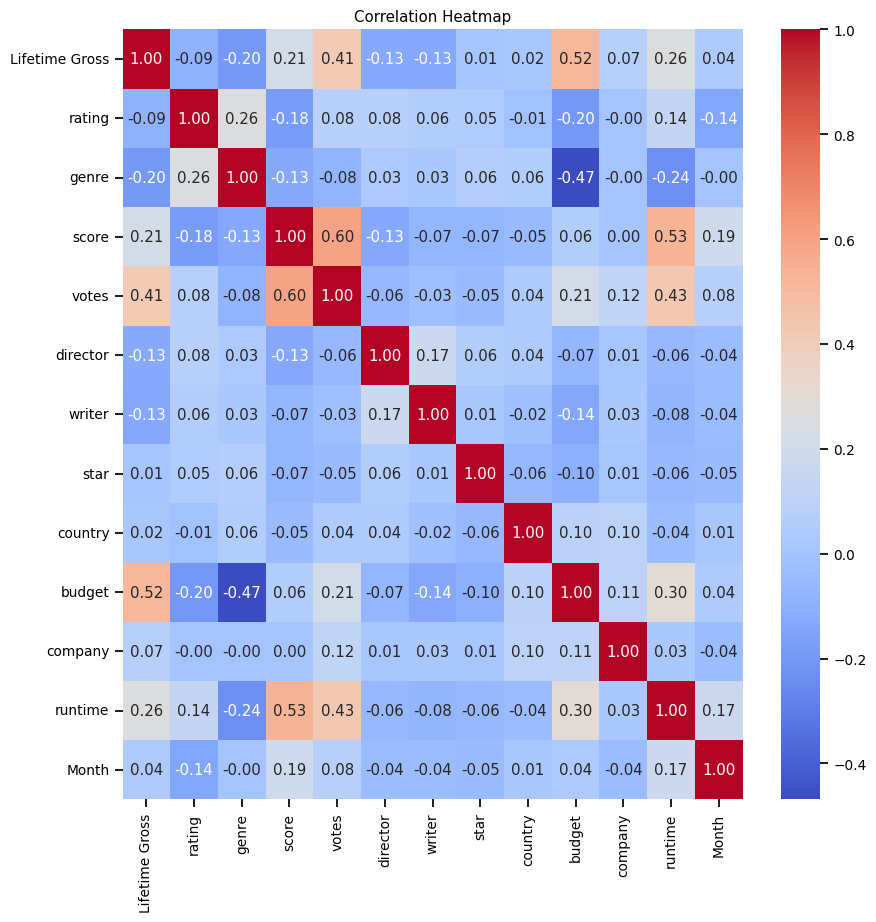

In [24]:
df2 = unique_titles_df.drop(["gross", "Title", "IMDB Rating", "Year"], axis = 1)

df2 = df2.dropna()

le = LabelEncoder()
string_cat = ["genre", "rating", "director", "writer", "star", "company", "country"]
for cat in string_cat:
    df2[cat] = le.fit_transform(df2[cat]) 	

#create correlation matrix
correlation_matrix = df2.corr()
correlation_matrix

# Set context for the plot
sns.set_context('notebook', font_scale=0.9)
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 10))

# Plot the heatmap
sns.heatmap(ax=ax, data=correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')

plt.title('Correlation Heatmap')
plt.show()

Most correlated variables:

1) budget - 0.52
2) votes - 0.41
3) runtime - 0.26
4) score - 0.21

From this, we can infer that higher budget and votes correlates to higher lifetime gross. We will keep this in mind.

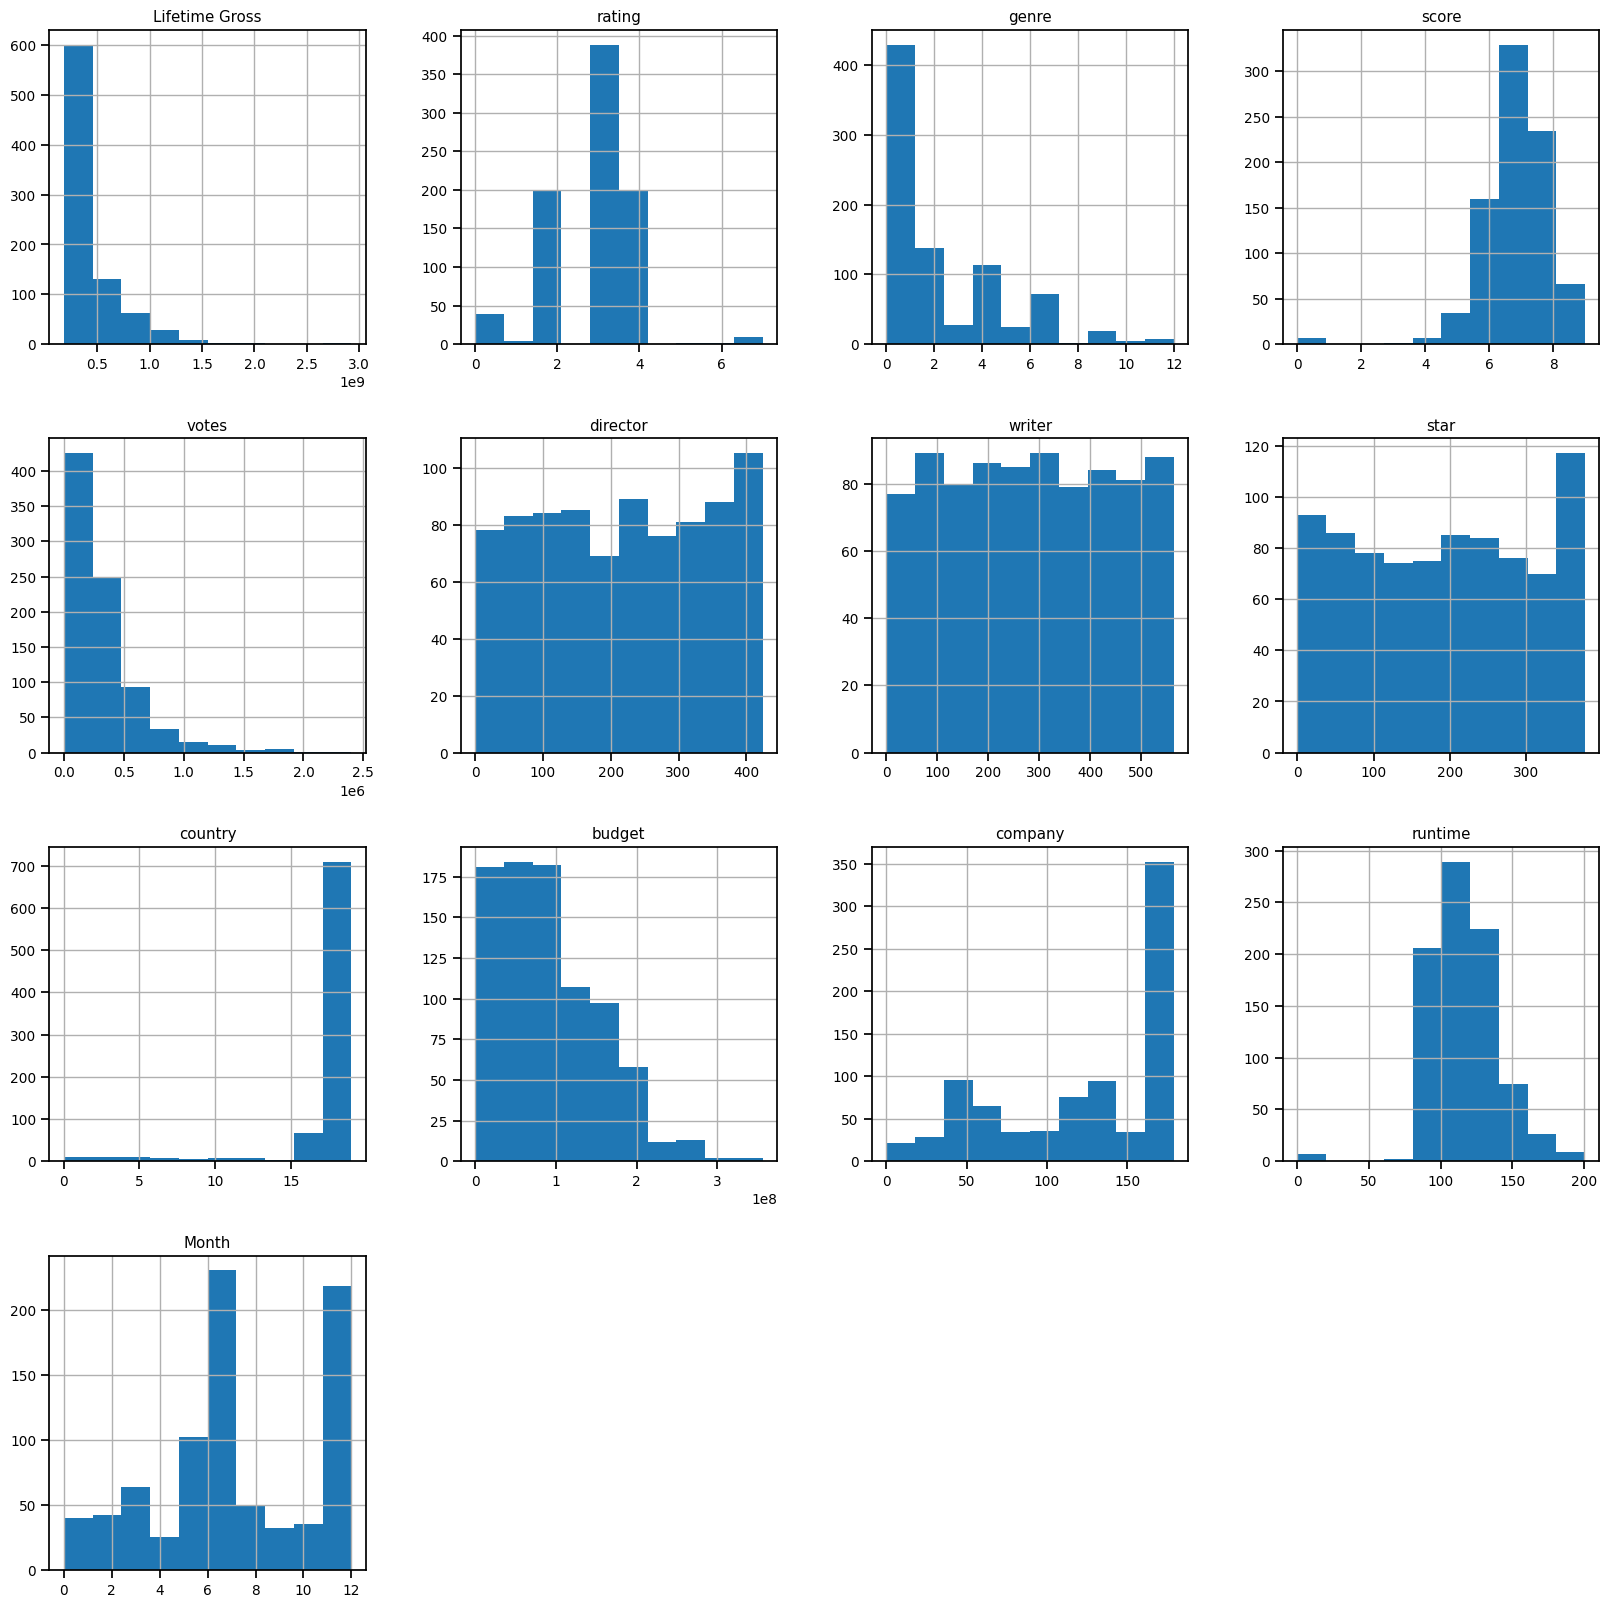

In [25]:
#plots the distributions
p = df2.hist(figsize=(20,20))


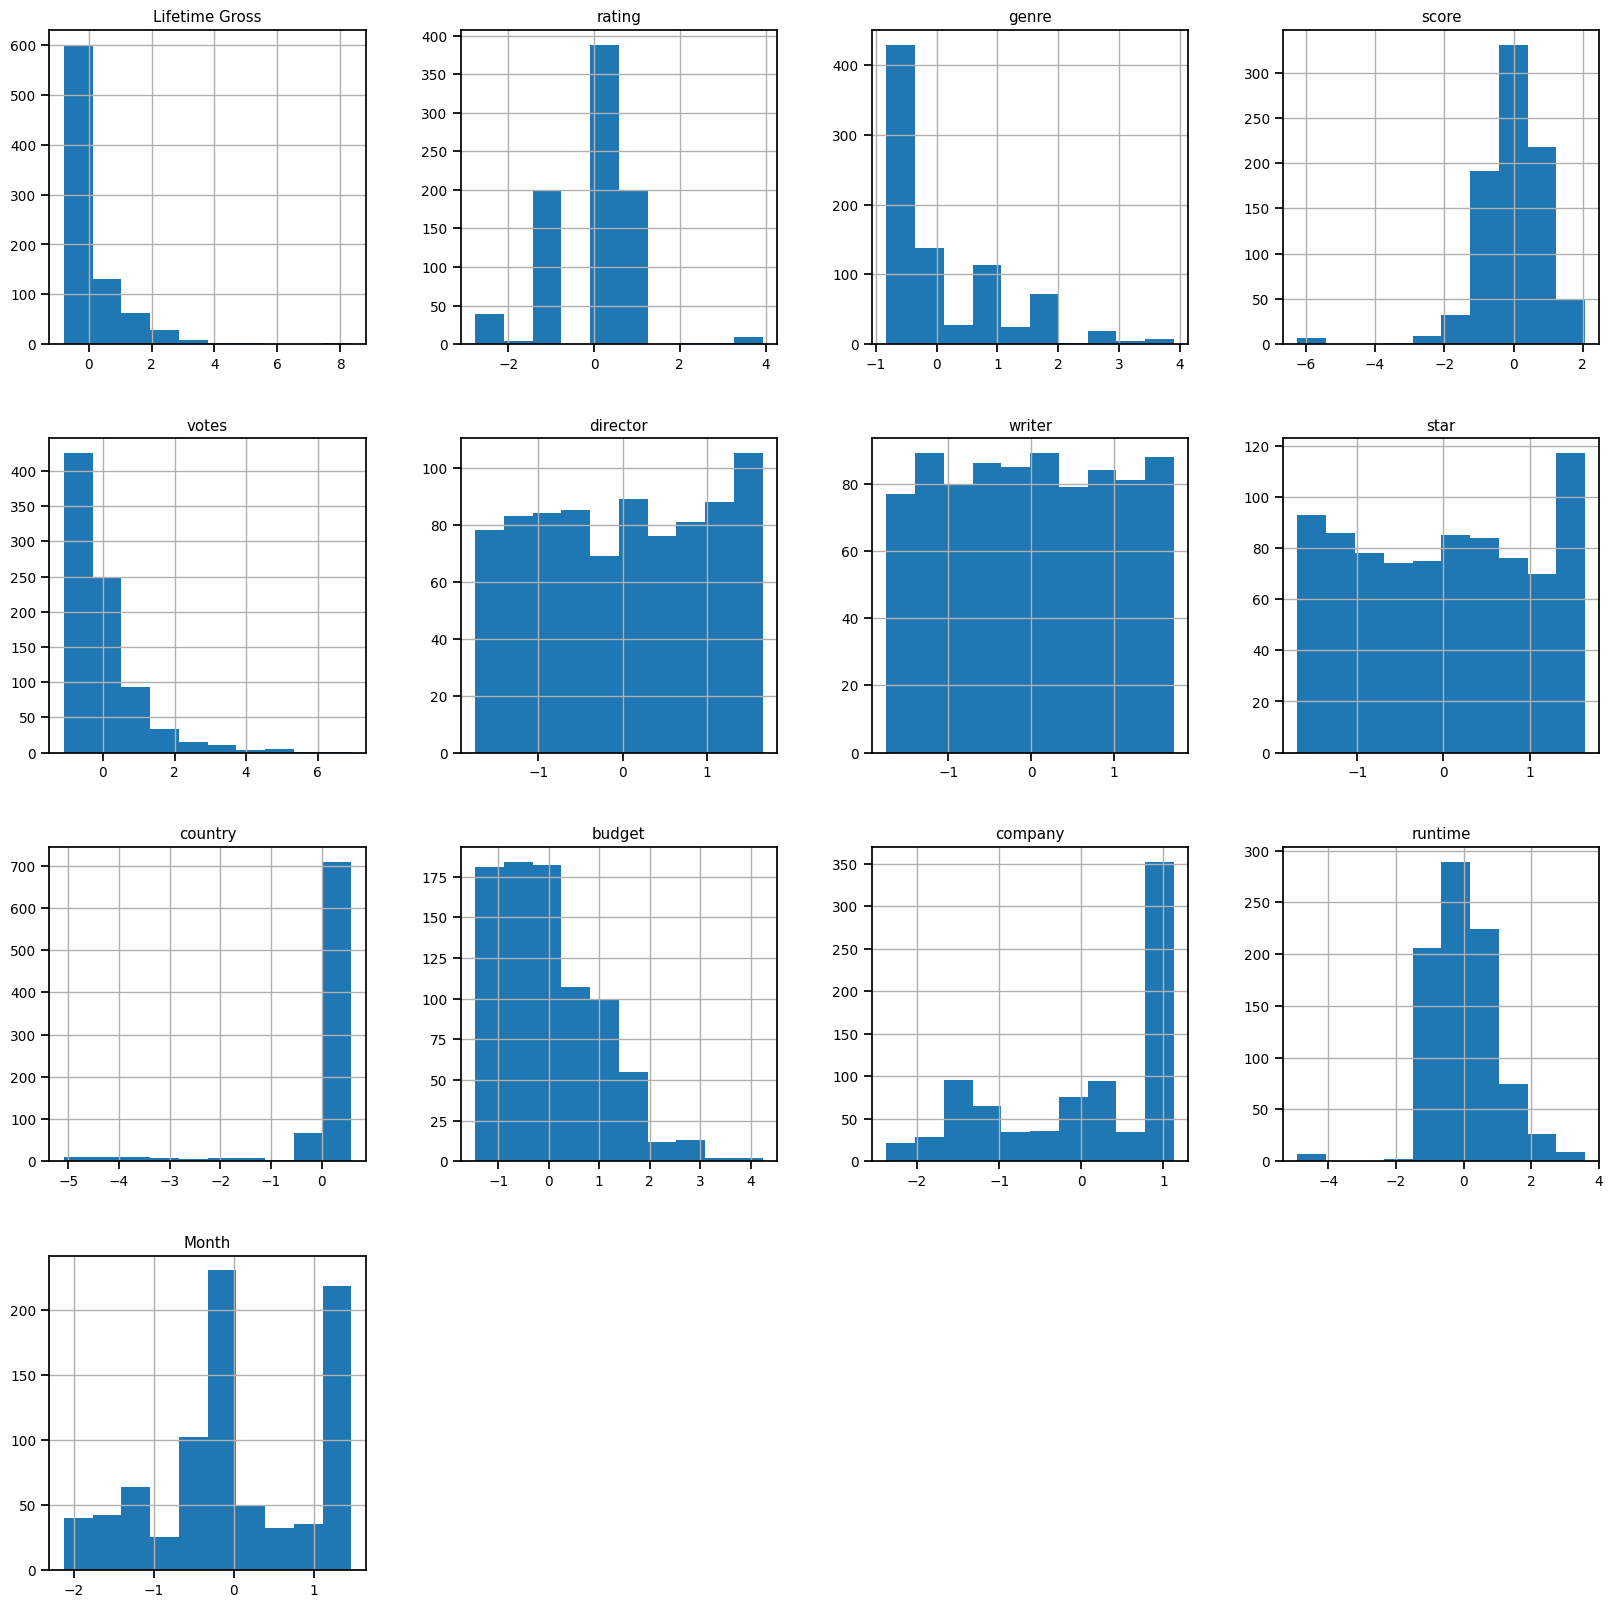

In [26]:
#standarize the data for faster convergence
scaler = StandardScaler()
scalar_df = scaler.fit_transform(df2)

scalar_df = pd.DataFrame(scalar_df, columns=df2.columns)

# plot the histograms
scalar_df.hist(figsize=(20, 20))
plt.show()

In [27]:

X = scalar_df.drop("Lifetime Gross", axis = 1)
y = df2["Lifetime Gross"]

#training and testing set (no validation?)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

X_train.shape

(670, 12)

### Neural Network

After experimenting with various model configurations, such as changing the depth, the size, and the usage of dropout layers, we found our that the best model is the model coded below. 

In [34]:
def construct_fnn(input_shape, output_shape):
    '''
    construct a fully connected neural network

    Parameters
    ----------
    input_shape : user-supplied input shape
    output_shape : user-supplied output shape

    Returns
    -------
    the constructed model
    '''
    FNN_model = tf.keras.models.Sequential([
    layers.Dense(20, input_shape = (input_shape,), activation='relu', kernel_initializer='he_normal'),
    layers.Dense(20, activation='relu', kernel_initializer='he_normal'),
    layers.Dense(15, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='relu', kernel_initializer='he_normal'), 
    layers.Dense(output_shape)
    ],
    name = "FNN_Model",
    )
    return FNN_model


#input shape is 12 because 12 features
input_shape = 12
#output shape is 1 because of one label
output_shape = 1
#call the function
FNN_model = construct_fnn(input_shape, output_shape)
FNN_model.summary()

/Users/kyoimura/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "FNN_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 20)             │           260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 15)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,166 (4.55 KB)

 Trainable params: 1,166 (4.55 KB)

 Non-trainable params: 0 (0.00 B)

In [35]:
def train_model(model, training_samples, test_samples, batch_size, epochs):
    """
    trains the model, then evaluate its performance on the test samples, 
    and then return the training history.

    Parameters:
    -----------
    model : user-supplied input
    training_samples : training images and labels (train_images, train_labels).
    test_samples : test images and labels (test_images, test_labels).
    batch_size : Batch size

    Returns:
    -------
    history : history containing loss and accuracy metrics.
    """

    # separate images and labels
    train_images = training_samples[0]
    train_labels = training_samples[1]
    test_images = test_samples[0]
    test_labels = test_samples[1]

    adam = keras.optimizers.Adam(
    learning_rate=0.01,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07,
    amsgrad=False,
    clipnorm=None,
    clipvalue=None,
    global_clipnorm=None,
    name="adam",
    )
    
    loss_fn = tf.keras.losses.MeanAbsolutePercentageError()
    mape = keras.metrics.MeanAbsolutePercentageError()

    # compile model
    model.compile(optimizer=adam,
              loss= loss_fn,
              metrics=[mape])
    
    # train the model and returns the test accuracy after each epoch
    history = model.fit(X_train, y_train, epochs = epochs, batch_size = batch_size, validation_data = (X_test, y_test) )
    return history



FNN model

Batch size = 16, Epoch = 50 

Epoch 1/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 100.0000 - mean_absolute_percentage_error: 100.0000 - val_loss: 100.0000 - val_mean_absolute_percentage_error: 100.0000
Epoch 2/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 100.0000 - mean_absolute_percentage_error: 100.0000 - val_loss: 100.0000 - val_mean_absolute_percentage_error: 100.0000
Epoch 3/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 99.9999 - mean_absolute_percentage_error: 99.9999 - val_loss: 99.9970 - val_mean_absolute_percentage_error: 99.9970
Epoch 4/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 99.9773 - mean_absolute_percentage_error: 99.9773 - val_loss: 99.7346 - val_mean_absolute_percentage_error: 99.7346
Epoch 5/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 99.3169 - mean_absolute_percentage_error: 99.3169 - val_loss: 96.3815 - val_mean_absolute_percentage_error: 96.3815
Epoch 6/50
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 93.5948 - mean_absolut

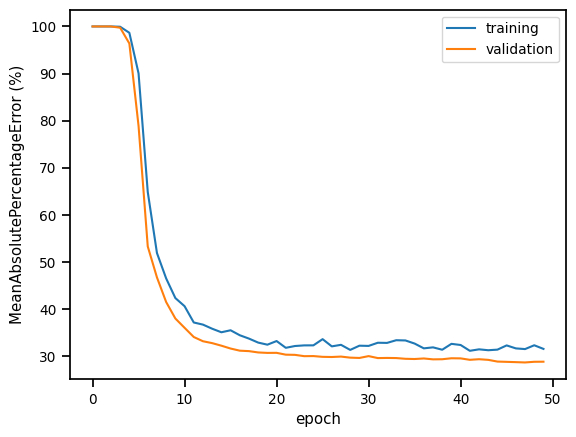

In [36]:
# Train the model with different batch sizes and collect histories
print('FNN model\n')
print('Batch size = 16, Epoch = 50 \n')
fnn_history_8 = train_model(FNN_model, (X_train, y_train), (X_test, y_test), 16, 50)

# Evaluate the model, first value is loss, second value is MAPE
print('Evaluation results (Batch size = 16, Epoch = 50):', FNN_model.evaluate(X_test, y_test, verbose=0))

plt.plot(fnn_history_8.history["loss"], label = "training")
plt.plot(fnn_history_8.history["val_loss"], label = "validation")
plt.gca().set(xlabel = "epoch", ylabel = "MeanAbsolutePercentageError (%)")
plt.legend()
plt.show()

The training loss is a little "ridgy", as in the plot fluctuates, but the validation loss is smoother and decreasing, and this suggests that the model is learning well and generalizing to the validation data despite some instability during training.

### Model Comparison

In [37]:
lm = LinearRegression()
lm.fit(X_train, y_train)
y_lm_pred = lm.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_lm_pred)
print("Mean Absolute Percentage Error:", mape)

Mean Absolute Percentage Error: 0.4189001777930802


In [38]:
Cval = 100
eps= 1

SVRreg = SVR(C=Cval, epsilon=eps)
SVRreg.fit(X_train,y_train)
y_SVR_pred = SVRreg.predict(X_test)
mape = mean_absolute_percentage_error(y_test, y_SVR_pred)
print("Mean Absolute Percentage Error:", mape)   

Mean Absolute Percentage Error: 0.3608720281804035


In [33]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
mape = mean_absolute_percentage_error(y_test, rf_pred)
print("Random Forest Model MAPE:", mape)

Random Forest Model MAPE: 0.35848986033967045


Our model does well than some of the sklearn models.